# Part II - Marketing Strategy for Ford GoBikes
## by Itunuoluwa Olowoye

## Investigation Overview
In this investigation, I want to look at the most active stations, most active users, diversity of users, and how to encourage users to use more Ford GoBikes.
## Dataset Overview
There are more than 180,000 bike sharing rides. These rides are grouped by user type (customer or subscriber) and gender (male, female, or other). We also have the location and names of start and end stations along with how long the trip took.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_systems = pd.read_csv('201902-fordgobike-tripdata.csv')

## Bike stations with highest number of starting trips
There are 329 starting bike stations and only 20 of them started more than 1500 trips. The top two stations are **Market St at 10th St** and **San Francisco Caltrain Station 2 (Townsend St at 4th St))**.

`Market St at 10th St` **starts** the highest trips and `San Francisco Caltrain Station 2 (Townsend St at 4th St)` **ends** the highest trips.

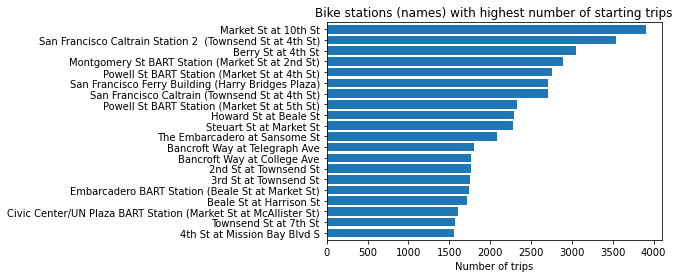

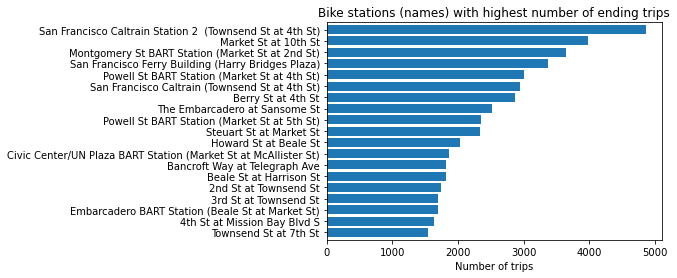

In [3]:
# define function to plot bar chart
# define function to pull stations with highest trips
def highest(data):
    # count start station names
    stations = data.value_counts()

    # turn series to dataframe and rename columns
    df = stations.to_frame().reset_index()
    df.rename(columns={'index':'station', df.columns[1]:'count'}, inplace=True)

    # select stations with more than 1500 trips
    highest_stations = df.query('count > 1500')

    # dimension of dataframe
    return highest_stations

highest_start_station_names = highest(bike_systems.start_station_name)

def barchart(dataframe1,title1):
    # figure size
    # bar color
    color = sb.color_palette()[0]
    # plot chart in descending order
    dataframe1 = dataframe1.sort_values('count', ascending=True)
    dataframe1.plot(kind='barh', x='station', y='count', width=0.8, color=color, legend=False)
    # add chart attributes
    plt.xlabel('Number of trips')
    plt.ylabel(None)
    plt.title(title1);
dataframe1 = highest_start_station_names
title1 = 'Bike stations (names) with highest number of starting trips'
barchart(dataframe1, title1);

highest_end_station_name = highest(bike_systems.end_station_name)

# bar chart of starting bike stations
dataframe1 = highest_end_station_name
title1 = 'Bike stations (names) with highest number of ending trips'
barchart(dataframe1, title1);

## Demographic distribution of users
There are approximately 90% subscribers. There are many more male users, both as customers and as subscribers. A campaign can be planned to drive in more female users and other genders for *diversity, equity and inclusion.*

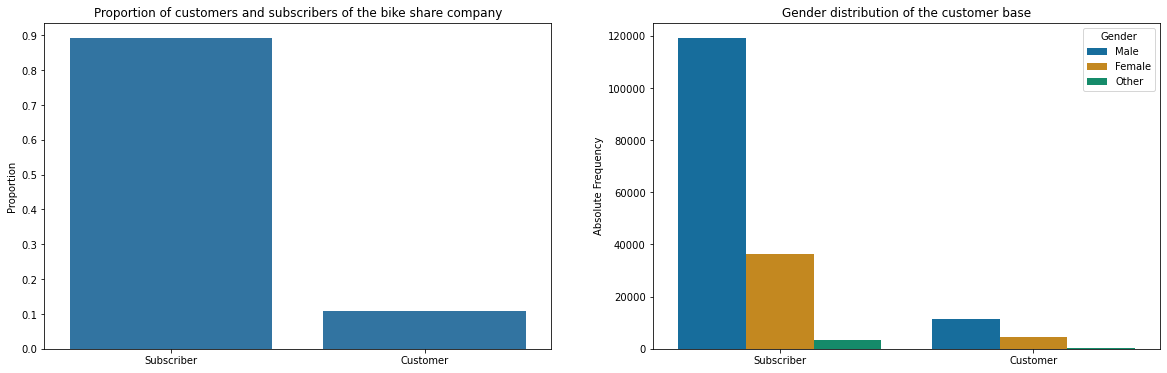

In [7]:
color = sb.color_palette()[0]
def cat_plot(data, title):
    # bar plot of proportion of user types
    df = data.value_counts(normalize=True, sort=True).to_frame().reset_index()
    sb.barplot(data=df, x='index', y=df.columns[1], color=color, order=df['index'])

    # plot attributes
    ticks = np.arange(0,1,0.1)
    plt.yticks(ticks=ticks)
    plt.ylabel('Proportion')
    plt.xlabel(None)
    plt.title(title);
# create bar plot of age demography of the different user types
plt.figure(figsize = [20, 6]) 

# user type subplot
plt.subplot(1, 2, 1)
title = 'Proportion of customers and subscribers of the bike share company'
cat_plot(bike_systems['user_type'], title)

plt.subplot(1, 2, 2)
sb.countplot(data=bike_systems, x="user_type", order = ['Subscriber','Customer'],
             hue='member_gender', hue_order=['Male','Female','Other'],
            palette='colorblind')
plt.legend(title='Gender')
plt.xlabel(None)
plt.ylabel('Absolute Frequency')
plt.title('Gender distribution of the customer base');

## Relationship between trip duration, user type and age
Subscribers spend less time on trips regardless of gender. A lot of users between 20 and 40 years old take trips that last between 300 seconds (5 minutes) and 1000 seconds (17 minutes).

Marketing strategy can be tailored towards getting more people to take longer rides. Safety can be advertised since older people (more than 80 years old) are using it too. Promos can be run for subcribers to encourage them to take longer trips. The campaign for more female participation can also leverage this.

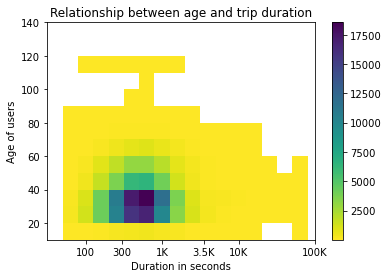

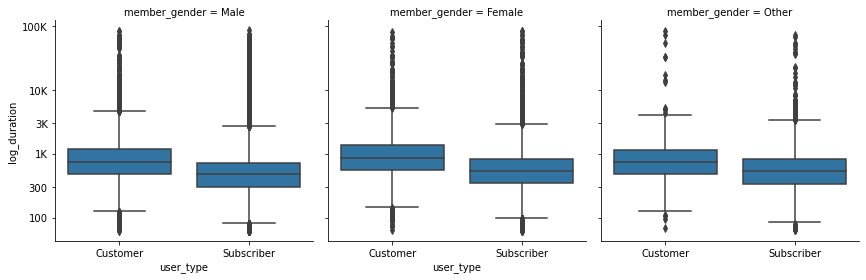

In [14]:
# create age column from birth year range
bike_systems['age'] = 2019 - bike_systems['member_birth_year']
# remove null entries
not_null = bike_systems[bike_systems.age.notnull()]

# create function for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

# x-values for bins
not_null['duration_sec'].apply(log_trans).describe()

# heat map of duration and age
bins_y = np.arange(10, 150, 10)
bins_x = np.arange(1.5, 5+0.1, 0.2)
plt.hist2d(x=not_null['duration_sec'].apply(log_trans), y=not_null['age'], cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y])
plt.colorbar()
ticks = [100, 300, 1000, 3500, 10000, 100000]
labels = ['100', '300', '1K', '3.5K', '10K', '100K']
plt.xticks(log_trans(ticks), labels)
plt.xlabel('Duration in seconds')
plt.ylabel('Age of users')
plt.title('Relationship between age and trip duration');

# create column for log scale of trip duration
bike_systems['log_duration'] = bike_systems['duration_sec'].apply(log_trans)

# create box plot
g = sb.FacetGrid(data = bike_systems, col = 'member_gender', col_order= ['Male','Female','Other'], size = 4)
g.map(sb.boxplot, 'user_type', 'log_duration', order=['Customer','Subscriber'])
plt.ylabel('Duration in seconds')
plt.xlabel(None)
ticks = [100, 300, 1000, 3000, 10000, 100000]
labels = ['100', '300', '1K', '3K', '10K', '100K']
plt.yticks(log_trans(ticks), labels);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [18]:
# Use this command if you are running this file in local
!jupyter nbconvert Itunuoluwa_Olowoye_FordGoBikes_Insights.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Itunuoluwa_Olowoye_FordGoBikes_Insights.ipynb to slides
[NbConvertApp] Writing 736469 bytes to Itunuoluwa_Olowoye_FordGoBikes_Insights.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\iolowoye\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\iolowoye\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\iolowoye\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\iolowoye\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\iolowoye\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
   

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
